In [262]:
import os
import pandas as pd
import numpy as np
from pymongo import MongoClient
import math
import re

client = MongoClient('localhost', 27017)
db = client['stock_remainings']
collection = db['Оборотная ведомость']

In [263]:
data = collection.find({"name": "Бумага для офисной техники IQ Allround А3, класса В+, 80 г/м2, 500л."})

In [264]:
df = pd.DataFrame(columns=['Kredit', 'дата'])
for document in data:
    df.loc[len(df)] = [document['единицы во кред'], document["квартал"]]

In [265]:
from datetime import datetime

date_list = [
    datetime(2022, 3, 31),
    datetime(2022, 6, 30),
    datetime(2022, 9, 30),
    datetime(2022, 12, 31)
]

df['дата'] = df['дата'].apply(lambda x: date_list[int(x) - 1])

In [266]:
df.head()

,Kredit,дата
0,15.0,2022-03-31
1,15.0,2022-06-30
2,25.0,2022-09-30
3,8.0,2022-12-31


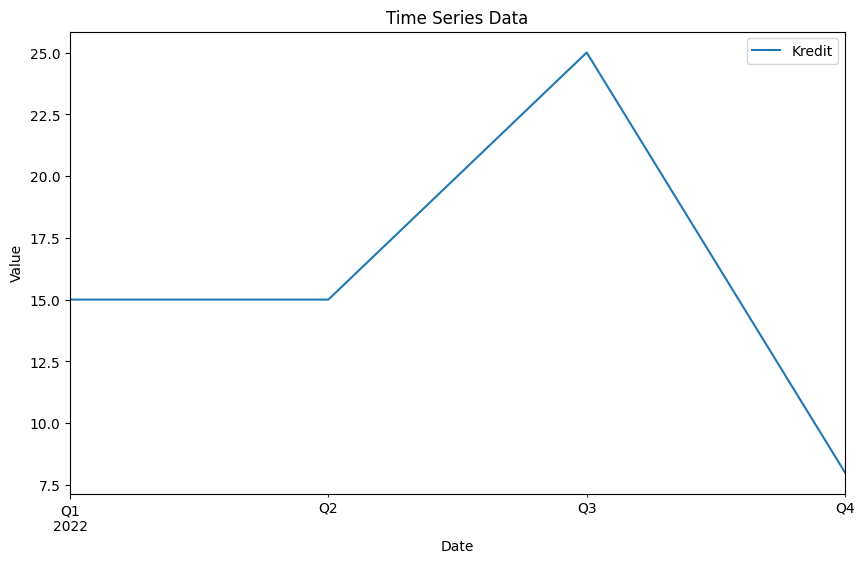

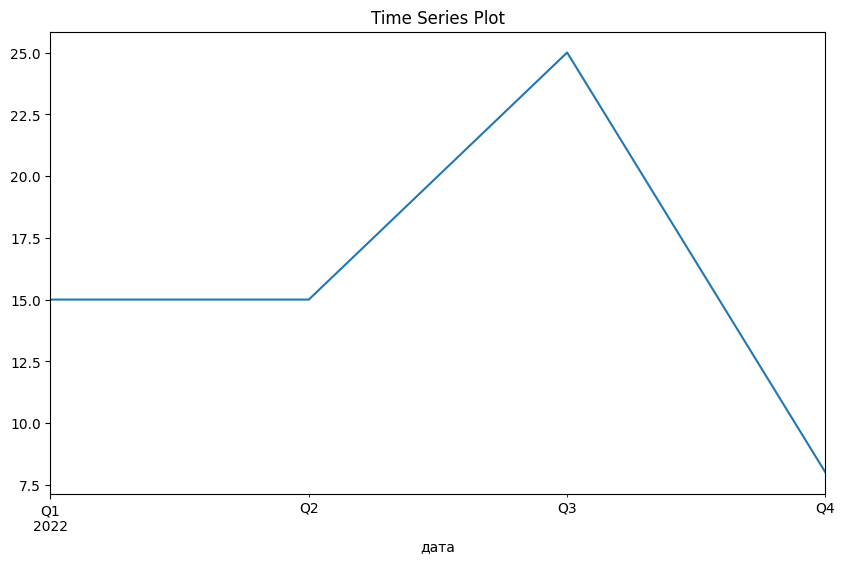

ValueError: There are no more samples after a first-order seasonal differencing. See http://alkaline-ml.com/pmdarima/seasonal-differencing-issues.html for a more in-depth explanation and potential work-arounds.

In [267]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df.set_index('дата', inplace=True)

# Ensure the index is sorted (if not already sorted)
df.sort_index(inplace=True)

# Visualize the data
df.plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Load your data
# df = pd.read_csv('your_data.csv')
# Assuming df['Kredit'] is your time series
ts = df['Kredit']

# Plot the time series
ts.plot(figsize=(10, 6))
plt.title('Time Series Plot')
plt.show()

# Use auto_arima to find the best parameters
model = auto_arima(df, seasonal=True, stepwise=True, trace=True, m=4)

# Forecasting
forecast = model.predict(n_periods=10)  # Forecast for 10 future time points
print("Forecasted values:")
print(forecast)

# # Plotting the forecast
# plt.figure(figsize=(10, 6))
# plt.plot(ts, label='Historical')
# plt.plot(pd.Series(forecast, index=pd.date_range(ts.index[-1], periods=10, freq='W')), label='Forecast')
# plt.legend()
# plt.show()



In [258]:
# Use auto_arima to find the best parameters
model = auto_arima(df, seasonal=False, stepwise=True, trace=True, m=4, D=0)

C:\Users\danil\Desktop\hackaton\.venv\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=35.922, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=35.958, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=34.765, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=36.132, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=29.335, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29.761, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.141 seconds


In [295]:
# Forecasting
forecast = model.predict(n_periods=3)  # Forecast for 10 future time points
print("Forecasted values:")
print(forecast)

Forecasted values:
2023-03-31    23.849737
2023-06-30    11.585552
2023-09-30    21.075314
Freq: QE-DEC, dtype: float64


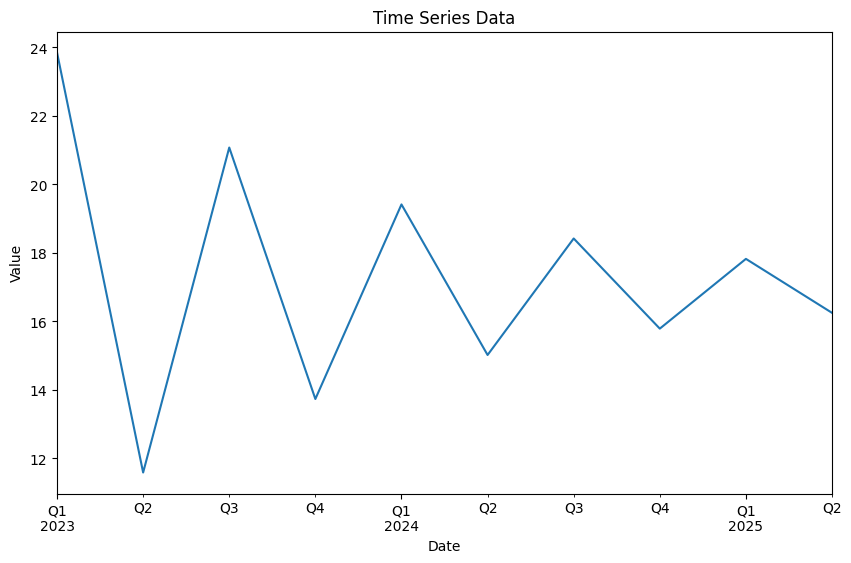

In [260]:
forecast.plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [134]:
print("Forecasted values:")
print(forecast)

Forecasted values:
2023-03-31    22.400213
2023-06-30    13.183205
2023-09-30    19.082648
2023-12-31    15.306647
2024-03-31    17.723517
2024-06-30    16.176574
2024-09-30    17.166711
2024-12-31    16.532963
2025-03-31    16.938600
2025-06-30    16.678968
Freq: QE-DEC, Name: predicted_mean, dtype: float64


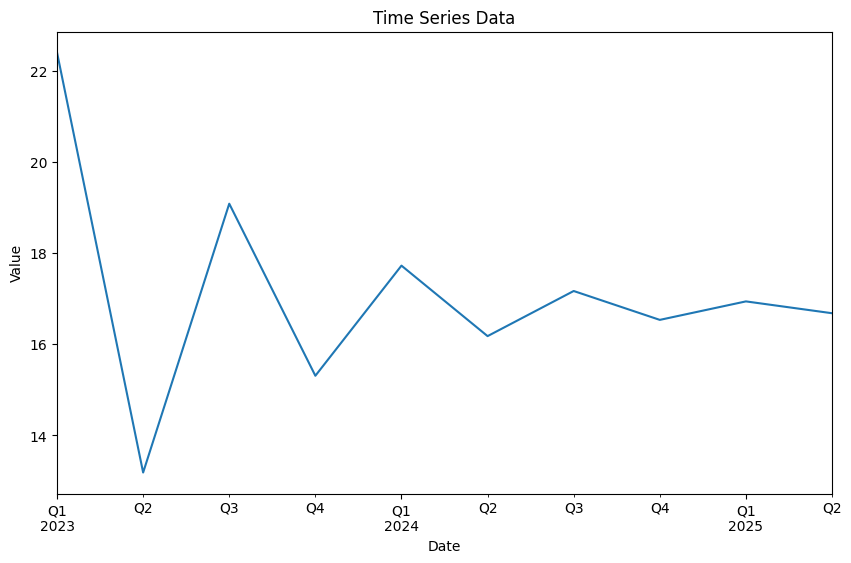

In [135]:
# Visualize the data
forecast.plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [140]:
client = MongoClient('localhost', 27017)
db = client['stock_remainings']
collection_ost = db['Складские остатки']
'Бумага для офисной техники IQ Allround А3, класса В+, 80 г/м2, 500л., упак'
data = collection_ost.find({"Название": "Бумага для офисной техники IQ Allround А3, класса В+, 80 г/м2, 500л."})
df = pd.DataFrame(columns=['дата', 'остатки'])
for document in data:
    df.loc[len(df)] = [document['Дата'], document['Остаток']]

In [141]:
df.head()

,дата,остатки
0,30.06.2022,85.0
1,30.09.2022,60.0
2,31.03.2022,100.0
3,31.12.2022,52.0


In [142]:
mean = df['остатки'].mean()

In [143]:
mean

74.25

2 квартала такой-то товар

In [200]:
from datetime import datetime
# df
df['дата'] = pd.to_datetime(df['дата'], dayfirst= True)
print(forecast.iloc[0])
def purchase(months):
    sum_of_purchase = 0
    for quarter in range(months//3):
        sum_of_purchase+= forecast.iloc[quarter]
    sum_of_purchase +=forecast.iloc[months//3] * (months%3)/3
    return mean - df.sort_values(by='дата').loc[df.index[-1],'остатки'] + sum_of_purchase

# last_available

22.400213290876003
37.18347552725067


In [296]:
df_forecast = forecast.reset_index()
df_forecast.columns = ['дата', 'прогноз']

In [297]:
df_forecast

,дата,прогноз
0,2023-03-31,23.849737
1,2023-06-30,11.585552
2,2023-09-30,21.075314


2023-03-31 00:00:00 2023-03-31 00:00:00
2023-03-31 00:00:00 2023-02-28 00:00:00
2023-03-31 00:00:00 2023-01-31 00:00:00
2023-06-30 00:00:00 2023-06-30 00:00:00
2023-06-30 00:00:00 2023-05-31 00:00:00
2023-06-30 00:00:00 2023-04-30 00:00:00
2023-09-30 00:00:00 2023-09-30 00:00:00
2023-09-30 00:00:00 2023-08-31 00:00:00
2023-09-30 00:00:00 2023-07-31 00:00:00


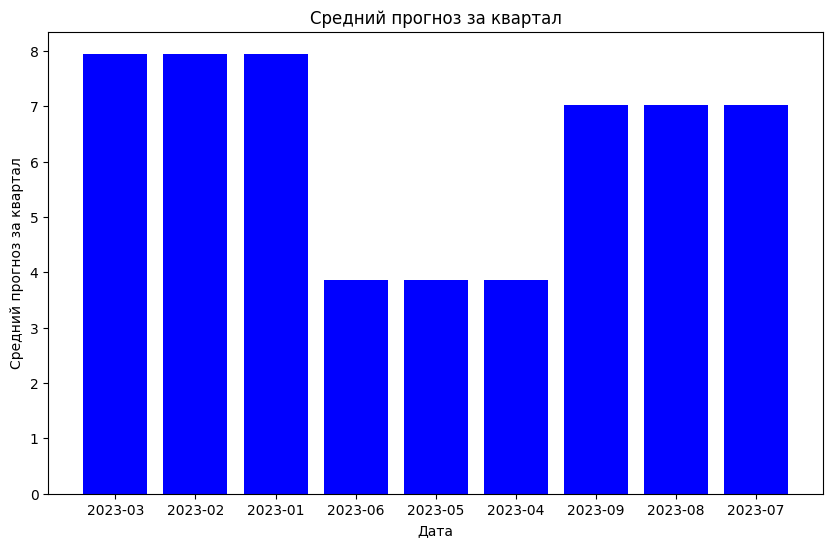

In [302]:
from datetime import timedelta
# Check if the number of months is divisible by 3
if False:
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(df_forecast['дата'].dt.strftime('%Y-%m'), df_forecast['прогноз'], color='blue')
    plt.xlabel('Дата')
    plt.ylabel('Прогноз')
    plt.title('Прогноз на конец каждого квартала')
    plt.show()
else:
    monthly_consuming = pd.DataFrame(columns=['дата', 'прогноз'])
    for index, row in df_forecast.iterrows():
        avg_consuming = row['прогноз'] / 3
        for month in range(3):
            print(row['дата'], row['дата'] - pd.offsets.MonthEnd(month))
            monthly_consuming.loc[len(monthly_consuming)] = [row['дата'] - pd.offsets.MonthEnd(month), avg_consuming]
            
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_consuming['дата'].dt.strftime('%Y-%m'), monthly_consuming['прогноз'], color='blue')
    plt.xlabel('Дата')
    plt.ylabel('Средний прогноз за квартал')
    plt.title('Средний прогноз за квартал')
    plt.show()

In [288]:
monthly_consuming

,дата,прогноз
0,2023-03-31,7.949912
1,2023-02-28,7.949912
2,2023-01-31,7.949912
3,2023-06-30,3.861851
4,2023-05-31,3.861851
5,2023-04-30,3.861851
6,2023-09-30,7.025105
7,2023-08-31,7.025105
8,2023-07-31,7.025105
9,2023-12-31,4.577447


In [310]:
from pymongo import MongoClient
from pprint import pprint

# Connect to MongoDB
client = MongoClient('localhost', 27017)
db = client['stock_remainings']
collection = db['Оборотная ведомость']

# Define the aggregation pipeline
pipeline = [
    {
        "$project": {
            "год": {"$toString": "$год"},  # Ensure year is a string
            "квартал": "$квартал",  # Quarter is already a string
            "start_date": {
                "$switch": {
                    "branches": [
                        {"case": {"$eq": ["$квартал", "1"]}, "then": {"$concat": ["$год", "-03-31"]}},
                        {"case": {"$eq": ["$квартал", "2"]}, "then": {"$concat": ["$год", "-06-30"]}},
                        {"case": {"$eq": ["$квартал", "3"]}, "then": {"$concat": ["$год", "-09-30"]}},
                        {"case": {"$eq": ["$квартал", "4"]}, "then": {"$concat": ["$год", "-12-31"]}}
                    ],
                    "default": "unknown"
                }
            }
        }
    },
    {
        "$group": {
            "_id": "$start_date"
        }
    },
    {
        "$project": {
            "date": "$_id"
        }
    }
]

# Execute the aggregation pipeline
result = list(collection.aggregate(pipeline))

# Extract the dates from the result
dates = [doc['date'] for doc in result]

# Print or further process the dates
print(dates)


['2022-12-31', '2022-09-30', '2022-03-31', '2022-06-30']
